In [ ]:
import ast
import numpy as np
import time
import sys
import pandas as pd
import subprocess
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
import random as rand
import matplotlib.pyplot as plt

In [ ]:
# Google Colab
%cd "drive/My Drive/internship-2020"

/content/drive/My Drive/internship-2020


In [ ]:
from npm1_data_loading import km_normed_1, npm1_filtered
print(km_normed_1.shape)

(691, 1309)


In [ ]:
%%time
from npm1_data_loading import km_normed_1, npm1_filtered
classifier = MLPClassifier(hidden_layer_sizes=(512,128,8), 
                           max_iter=1000, 
                           activation = 'relu', 
                           solver='sgd', 
                           learning_rate='adaptive', 
                           tol=0, shuffle=True, 
                           random_state=0, verbose=0
                           )
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, npm1_filtered, random_state=0)
classifier.fit(x_train, y_train)

CPU times: user 1min 37s, sys: 24.1 s, total: 2min 1s
Wall time: 1min 1s


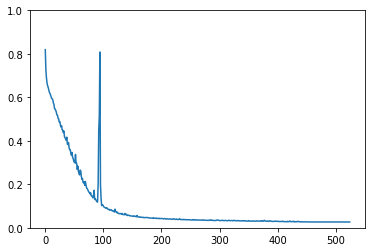

0.984375


In [ ]:
plt.plot(classifier.loss_curve_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier.predict(x_test)
print(roc_auc_score(y_test, y_pred))

In [ ]:
sum(npm1_filtered), len(npm1_filtered) - sum(npm1_filtered)

(242, 449)

In [ ]:
# Redo with same PyTorch code as other models so we can really verify the efficacy of the splitting and model!

### Data Visualisation

In [ ]:
negatives = pd.concat((x_train[np.array(y_train) == 0], x_test[np.array(y_test) == 0]))
positives = pd.concat((x_train[np.array(y_train) == 1], x_test[np.array(y_test) == 1]))

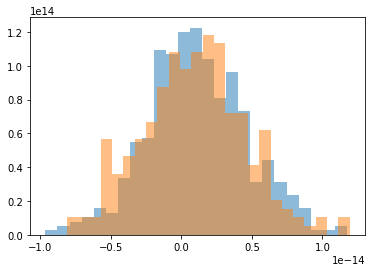

In [ ]:
# Median per patient
plt.hist(np.mean(negatives,axis=1), bins=25, alpha = 0.5, label='negatives', density=True)
plt.hist(np.mean(positives,axis=1), bins=25, alpha = 0.5, label='positives', density=True)
plt.show()

In [ ]:
def compare_kmer_plot(i):
    print(i)
    plt.hist(negatives.iloc[:,i], bins=25, alpha = 0.5, label='negatives', density=True)
    plt.hist(positives.iloc[:,i], bins=25, alpha = 0.5, label='positives', density=True)
    plt.show()

192


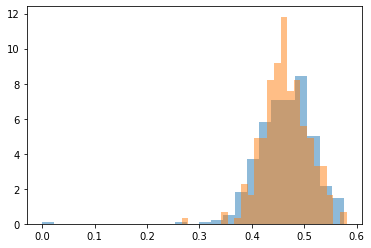

1137


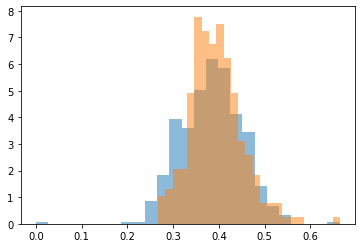

302


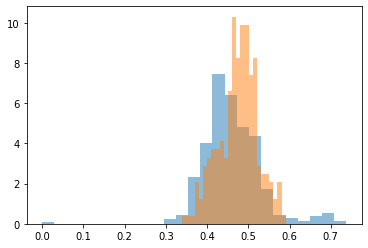

247


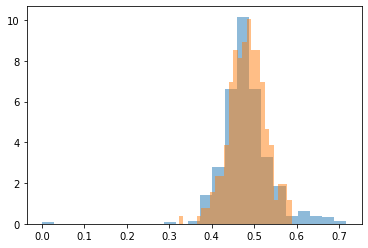

1090


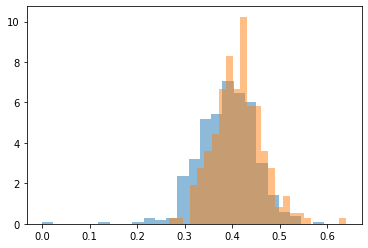

1110


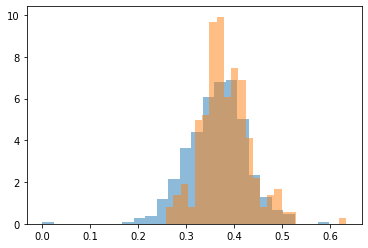

498


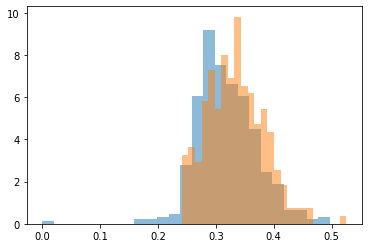

480


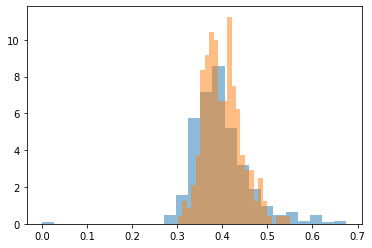

1049


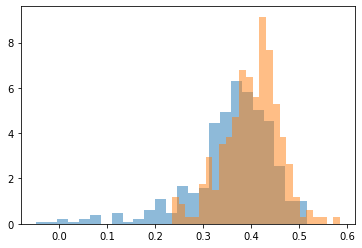

441


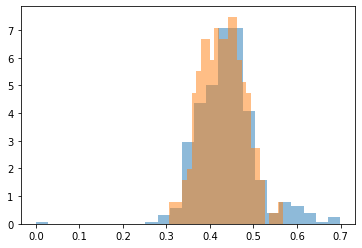

In [ ]:
for i in range(10):
    compare_kmer_plot(rand.randrange(0,km_normed_1.shape[1]))

In [ ]:
# Difference in means per kmer between positive and negative examples
diff_pos_neg = np.abs(np.mean(positives, axis=0) - np.mean(negatives, axis=0))

In [ ]:
# Sum of all weights for a single input neuron (kmer)
input_weights = classifier.coefs_[0]
print(input_weights.shape)
sum_weights = np.sum(np.array(input_weights), axis=1)

(1309, 512)


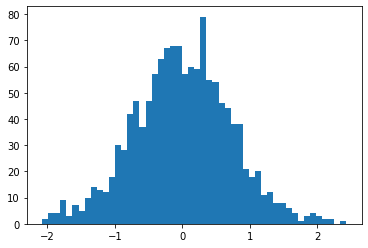

In [ ]:
plt.hist(sum_weights, bins=50)
plt.show()

0.032948461547854184


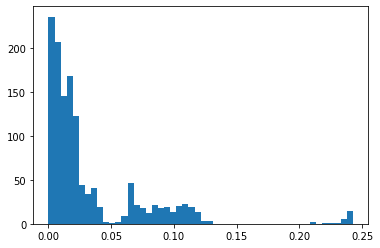

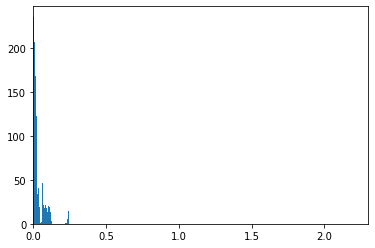

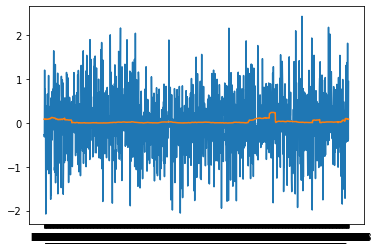

In [ ]:
print(np.mean(diff_pos_neg))
plt.hist(diff_pos_neg, bins=50)
#plt.xlim(0, 2.3)
plt.show()
plt.hist(diff_pos_neg, bins=50)
plt.xlim(0, 2.3)
plt.show()
plt.plot(sum_weights)
plt.plot(diff_pos_neg)
plt.show()
# do without norm